<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Graduate-school/blob/main/Cosine_similarity(%EC%BD%94%EC%82%AC%EC%9D%B8_%EC%9C%A0%EC%82%AC%EB%8F%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.개요 

추천시스템 어떠한 방법으로 작동하는지 호기심으로 부터 시작 

코사인 유사도는 어느 경우에 사용 하는지에 대해 파이썬을 이용하여 정리

In [4]:
import pandas  as pd 
import numpy as np

# 2.데이터 준비

블로그 예시 데이터 이용

In [5]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

In [8]:
#위 코드에서 알수있는점 1.넘파이로 만든 배열을 df로 변환시킬수있으며 columns 지정이 가능함 

df=pd.DataFrame(X,columns=['weight','length','label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


In [11]:
#헷갈리는 point 1 아래 코드같이 df['label']==0 일경우 인덱스와 리스트 형식으로 반환시킴 즉 0인거로만 필터링이 안됌 
ax =df['label'] == 0

0     False
1     False
2     False
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13     True
14     True
Name: label, dtype: bool

In [13]:
#따라서 df형식으로 보기 위해서는 밖에 df로 한번더 감싸줘야함  위에서 4,5,12,13,14번이 True이므로 DF 내에서 True 만 리턴 

ax =df[df['label'] == 0]

,weight,length,label
4,1.3,2.7,0.0
5,2.3,3.1,0.0
12,2.5,3.8,0.0
13,2.0,3.1,0.0
14,1.3,1.3,0.0


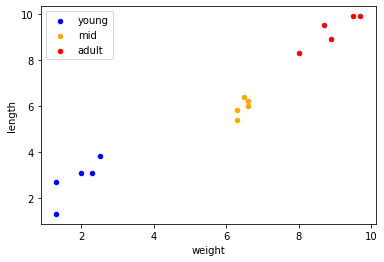

In [14]:
ax =df[df['label'] == 0].plot.scatter(x='weight',y='length',c='blue',label='young')
ax =df[df['label'] == 1].plot.scatter(x='weight',y='length',c='orange',label='mid',ax=ax)
ax =df[df['label'] == 2].plot.scatter(x='weight',y='length',c='red',label='adult',ax=ax)
ax

위 데이터는 키와 몸무게에 따른 나이를 추측하는 가상의 데이터이며 세가지 클래스는
weight 와 length 로 잘 구분이 된다 K-NN 이용시 어떤 거리 메트릭을 사용하는 것이 적절한지 봐보자.

# 3.매트릭 선별  

0,1,4번 인스턴스를 선별하여 14번 인스턴스에 어떤 레이블을 부여하는게 적절한지 확인

In [15]:
#iloc index기준으로 행만 뽑아내는 방식 loc 와 헷갈리지말것  

df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

In [16]:
df2

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
4,1.3,2.7,0.0


In [17]:
df3

,weight,length,label
14,1.3,1.3,0.0


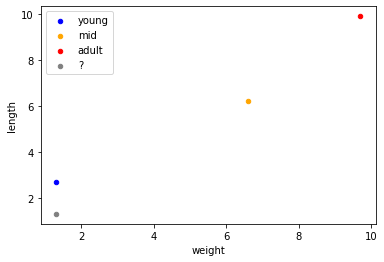

In [20]:
ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax

# 유클리드 거리 계산 



In [21]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x-y) ** 2)) 

In [28]:
#X에서 label 제외하고  0,1,4,14 인덱스에있는 값 추출 

x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print("x0:",x0,"\n x1:",x1,"\n x4:",x4,"\n x14:",x14)

print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
 x14: [1.3 1.3]
 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


직관적으로 x14와x4가 거리가 가장 가까우므로 young class로 추측이가능하다 

그래프를 보았을때 우리가 직관적으로 생각한거와 큰 차이가 없다고 볼수있음

# 코사인 유사도 적용 

$${x*y \over \sqrt{x*x}  \sqrt{y*y}}$$

위 식을 코드로 구현 

In [30]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


위 결과  14와 1이 가깝게 나옴 유클리드 거리와는 다른 결과가 나타남 

그 이유는 유킬리드 거리는 줄자로 거리를 표현하는거면 코사인 유사도는  무게나 크기를 전혀 고려안하고 벡터  사이의 각도만으로 척정하는것과 사함 

즉 14번과 4번은줄자로 쟀을때 거리는 가깝지만 각도로 잴땐 가장 낮은 값이 된다

따라서 코사인 유사도는 길이를 정규화해 비교하는 것과 유사하다고 할 수 있으며 이 때문에 텍스트 데이터를 처리하는 메트릭으로 주로 사용된다. 주로 데이터 마이닝이나 정보 검색information retrieval에서 즐겨 사용된다.

In [36]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=74504975f718248790b9e7a5781dc5ca3e4f49a21872d97c912c6bbee52f2d5d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [52]:
import wikipedia

q1 = wikipedia.page('MachineLearning')
q2 = wikipedia.page('Artifical Intelligence')
q3 = wikipedia.page('Soccer')
q4 = wikipedia.page('Tennis')

PageError: ignored

In [51]:
q1.content[:100]

'Machine learning (ML) is the study of computer algorithms that improve automatically through experie'

In [53]:
q1.content.split()[:10]

['Machine',
 'learning',
 '(ML)',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that']

In [54]:
print("ML \t", len(q1.content.split()), "\n"
      "AI \t", len(q2.content.split()), "\n"
      "soccer \t", len(q3.content.split()))

ML 	 6918 
AI 	 7886 
soccer 	 6766


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1.content, q2.content, q3.content]).todense())

In [57]:
X

array([[1, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 2, 0],
       [2, 1, 0, ..., 2, 0, 1]])

In [58]:
print("ML - AI \t", euclidean_distance(X[0], X[1]), "\n"
      "ML - soccer \t", euclidean_distance(X[0], X[2]))

ML - AI 	 332.9204109092742 
ML - soccer 	 465.4062741304634


In [59]:
print("ML - AI \t", cosine_similarity(X[0], X[1]), "\n"
      "ML - soccer \t", cosine_similarity(X[0], X[2]))

ML - AI 	 0.875860738222465 
ML - soccer 	 0.791413275469877
